# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt

In [ ]:
!pip install seaborn

In [ ]:
commune = pd.read_excel(r'commune.xlsx')
enroll = pd.read_csv(r'enroll.csv')
industry = pd.read_csv(r'industry.csv')
ord = pd.read_csv(r'ord.csv')
quest = pd.read_csv(r'quest.csv')
study_domain = pd.read_csv(r'study_domain.csv')
technology = pd.read_csv(r'technology.csv')
transaction = pd.read_csv(r'transaction.csv')

In [ ]:
commune.head(1)

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08


In [ ]:
enroll.head(1)

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN


In [ ]:
industry.head(1)

,Unnamed: 0,key,values,quest_id
0,0,item1,Finance,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
ord.head(1)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601


In [ ]:
quest.head(1)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601


In [ ]:
study_domain.head(1)

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
technology.head(1)

,Unnamed: 0,key,values,quest_id
0,0,item1,R,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [ ]:
transaction.head(1)

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952


In [ ]:
industry =  pd.get_dummies(data = industry[['key','quest_id','values']], columns=['values'],prefix='', prefix_sep='')

In [ ]:
industry.quest_id.nunique()

246

In [ ]:
industry= industry.groupby('quest_id').sum()

In [ ]:
study_domain= pd.get_dummies(data=study_domain[['key','quest_id','values']], columns=['values'], prefix = '', prefix_sep='')


In [ ]:
study_domain.quest_id.nunique()


244

In [ ]:
study_domain= study_domain.groupby('quest_id').sum()

In [ ]:
technology = pd.get_dummies(data= technology[['quest_id','values']], columns=['values'], prefix='', prefix_sep='',)


In [ ]:
technology.quest_id.nunique()

244

In [ ]:
technology = technology.groupby('quest_id').sum()


In [ ]:
df=pd.merge(left=quest[['gender',	'dob',	'commune','created_at','department','have_computer_home','internet_at_home','hear_AA_1','quest_id','education_level','study_domain']], right=enroll[['quest_id','percentage_completed','started_at']], how = 'left',on='quest_id')
df1=pd.merge(left=df, right=study_domain, how = 'left',on='quest_id')
df2=pd.merge(left=df1, right=technology, how = 'left',on='quest_id')
df3=pd.merge(left=df2, right=industry, how = 'left',on='quest_id')
df3.shape

(250, 48)

In [ ]:
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

In [ ]:
commune["commune"] = commune["commune"].str.lower()

In [ ]:
df4=pd.merge(left=df3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')
df4.head(2)

,gender,dob,commune,created_at,department,have_computer_home,internet_at_home,hear_AA_1,quest_id,education_level,study_domain,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement
0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,NaN,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,[],0.0,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West
1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,ht01,Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Bachelors (bacc +4),['other'],NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West


In [ ]:
df4["created_at"] = df4["created_at"].str[:10]

In [ ]:
dff = pd.merge(left=ord, right=transaction, how = 'left',on='user_id')

In [ ]:
df5 = pd.merge(left=df4, right=dff, how = 'left',on='quest_id')

In [ ]:
#result5["dob"] = pd.to_datetime(result5["dob"])
df5["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
df5["dob"] = pd.to_datetime(df5["dob"])
df5.head(2)

,gender,dob,commune,created_at,department,have_computer_home,internet_at_home,hear_AA_1,quest_id,education_level,study_domain,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement,Unnamed: 0_x,created_at_x,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id
0,male,1998-08-25,ht0111,2021-02-14,NaN,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,[],0.0,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,1996-09-29,ht0111,2021-02-16,ht01,Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Bachelors (bacc +4),['other'],NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df5["created_at"] = pd.to_datetime(df5["created_at"])

In [ ]:
df5["age"]=((df5["created_at"]-df5["dob"])//365)

In [ ]:
df5["age"] = df5["age"].apply(lambda x: str(x)[:2])

In [ ]:
#df5['age'] = (df5['age']) //365

In [ ]:
df5.head(2)

,gender,dob,commune,created_at,department,have_computer_home,internet_at_home,hear_AA_1,quest_id,education_level,study_domain,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement,Unnamed: 0_x,created_at_x,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id,age
0,male,1998-08-25,ht0111,2021-02-14,NaN,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,[],0.0,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
1,female,1996-09-29,ht0111,2021-02-16,ht01,Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Bachelors (bacc +4),['other'],NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24


In [ ]:
df5.columns

Index(['gender', 'dob', 'commune', 'created_at', 'department',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'quest_id',
       'education_level', 'study_domain', 'percentage_completed', 'started_at',
       'Accounting', 'Computer Science', 'Economics', 'Electrical Engineering',
       'Law', 'Management', 'Medicine', 'Statistics', 'other_x', 'Bash',
       'Excel', 'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau',
       'Python', 'R', 'SQL', 'VBA', 'other_y', 'Communications', 'Consulting',
       'Education', 'Energy', 'Finance', 'Healthcare', 'Insurance',
       'Manufacturing', 'Marketing', 'Public Sector/ Non-Profit Agencies',
       'Retail/ E-Commerce', 'Technology (Software/ Internet)',
       'Transportation', 'other', 'Commune_FR', 'Departement', 'Unnamed: 0_x',
       'created_at_x', 'user_id', 'product_name', 'product_id',
       'amount_dollars', 'amount_cents', 'subscription', 'coupon_code',
       'coupon_id', 'affiliate_referral_code', 'status'

In [ ]:
df5.shape

(250, 68)

In [ ]:
df5.head(3)

,gender,dob,commune,created_at,department,have_computer_home,internet_at_home,hear_AA_1,quest_id,education_level,study_domain,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement,Unnamed: 0_x,created_at_x,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id,age
0,male,1998-08-25,ht0111,2021-02-14,NaN,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,[],0.000000,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
1,female,1996-09-29,ht0111,2021-02-16,ht01,Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Bachelors (bacc +4),['other'],NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
2,male,1996-05-17,ht0111,2021-02-16,ht01,Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Bachelors (bacc +4),[],0.325581,2021-02-20T21:20:37.814Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24


In [ ]:
df5.drop(['commune','Unnamed: 0_x','department','other','Unnamed: 0_y','user_id','product_name','other','modified_at','coupon_code','coupon_id','subscription','affiliate_referral_code','status','course_id','product_id','Transportation','Retail/ E-Commerce','Public Sector/ Non-Profit Agencies','study_domain','Technology (Software/ Internet)','amount_cents'], axis=1, inplace=True)

In [ ]:
df5.rename(columns={'created_at':'Inscription_date','hear_AA_1':'Means_of_communication'}, inplace=True)

In [ ]:
df5.head(1)

,gender,dob,Inscription_date,have_computer_home,internet_at_home,Means_of_communication,quest_id,education_level,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Commune_FR,Departement,created_at_x,amount_dollars,created_at_y,transaction_id,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,0.0,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,22


In [ ]:
#df5.created_at_x = df5['created_at_x'].fillna(value =df5.created_at_x.mean())

In [ ]:
df5.amount_dollars=df5["amount_dollars"].fillna(value =df5.amount_dollars.mean())

In [ ]:
df5.amount_dollars

0      15.714286
1      15.714286
2      15.714286
3      15.714286
4      15.714286
         ...    
245    15.714286
246    15.714286
247    20.000000
248    15.714286
249    15.714286
Name: amount_dollars, Length: 250, dtype: float64

In [ ]:
df5[df5.amount_dollars.isna()]

,gender,dob,Inscription_date,have_computer_home,internet_at_home,Means_of_communication,quest_id,education_level,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Commune_FR,Departement,created_at_x,amount_dollars,created_at_y,transaction_id,age


In [ ]:
df5.transaction_id=df5['transaction_id'].fillna(value =df5.transaction_id.mean())

In [ ]:
df5[df5.transaction_id.isna()]

,gender,dob,Inscription_date,have_computer_home,internet_at_home,Means_of_communication,quest_id,education_level,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Commune_FR,Departement,created_at_x,amount_dollars,created_at_y,transaction_id,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,0.000000,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,15.714286,NaN,NaN,22
1,female,1996-09-29,2021-02-16,Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,Bachelors (bacc +4),NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,15.714286,NaN,NaN,24
2,male,1996-05-17,2021-02-16,Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Bachelors (bacc +4),0.325581,2021-02-20T21:20:37.814Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Port-au-Prince,West,NaN,15.714286,NaN,NaN,24
3,male,1996-11-24,2021-02-16,Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,Bachelors (bacc +4),NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Port-au-Prince,West,NaN,15.714286,NaN,NaN,24
4,male,1997-07-20,2021-02-16,Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,High School (16 years),NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,15.714286,NaN,NaN,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,2021-03-02,Yes,Yes,Facebook,906b3c84-ce95-11eb-8c2a-7c67a234f601,Bachelors (bacc +4),0.883721,2021-03-02T18:45:27.034Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Mirebalais,Centre,NaN,15.714286,NaN,NaN,27
246,male,1990-08-10,2021-03-10,Yes,Yes,Friend,906b3c85-ce95-11eb-9b87-7c67a234f601,Bachelors (bacc +4),NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Mirebalais,Centre,NaN,15.714286,NaN,NaN,30
247,male,1993-12-28,2021-03-14,Yes,Yes,Friend,906b3c86-ce95-11eb-b6a7-7c67a234f601,Bachelors (bacc +4),0.325581,2021-03-14T15:34:56.007Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Mirebalais,Centre,2021-03-14T15:34:35.014Z,20.000000,NaN,NaN,27
248,male,1992-04-17,2021-03-08,Yes,Yes,Facebook,906b65e2-ce95-11eb-8b5c-7c67a234f601,Bachelors (bacc +4),0.418605,2021-03-08T19:10:36.694Z,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ferrier,North-East,NaN,15.714286,NaN,NaN,28


In [ ]:
df5.dob = df5['dob'].fillna(value =df5.dob.mean())

In [ ]:
df5[df5.dob.isna()]

,gender,dob,Inscription_date,have_computer_home,internet_at_home,Means_of_communication,quest_id,education_level,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Commune_FR,Departement,created_at_x,amount_dollars,created_at_y,transaction_id,age


In [ ]:
df5.head(1)

,gender,dob,Inscription_date,have_computer_home,internet_at_home,Means_of_communication,quest_id,education_level,percentage_completed,started_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Commune_FR,Departement,created_at_x,amount_dollars,created_at_y,transaction_id,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,unknown,0.0,2021-02-17T08:43:53.457Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,15.714286,NaN,NaN,22


In [ ]:
df5.shape

(250, 47)

In [ ]:
df5.describe()

,percentage_completed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,amount_dollars,transaction_id
count,102.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,250.000000,0.0
mean,0.331911,0.049180,0.393443,0.118852,0.016393,0.049180,0.151639,0.024590,0.077869,0.295082,0.040984,0.823770,0.106557,0.303279,0.221311,0.258197,0.061475,0.266393,0.143443,0.356557,0.036885,0.159836,0.296748,0.280488,0.227642,0.134146,0.373984,0.142276,0.089431,0.052846,0.341463,15.714286,NaN
std,0.334146,0.216689,0.489518,0.324280,0.127244,0.216689,0.359408,0.155191,0.268516,0.457017,0.198660,0.381798,0.309184,0.460619,0.415983,0.438542,0.240694,0.442981,0.351244,0.479967,0.188867,0.367207,0.457756,0.450153,0.420165,0.341504,0.484846,0.350046,0.285946,0.224181,0.475167,1.945912,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.714286,NaN
50%,0.294020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.714286,NaN
75%,0.587209,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,15.714286,NaN
max,0.953488,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,NaN


In [ ]:
#f=df5['Commune_FR].to_frame()

In [ ]:
def generate_barchart(data=df, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
           tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='yellow',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
           tot+10,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [ ]:
def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20)):
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     df = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data= df, title= title, abs_value =abs_value, rel_value=rel_value, figsize = figsize)
     return df

In [ ]:
pvtable1= pd.pivot_table(data=df5, values ='quest_id', index='Commune_FR', columns='gender', aggfunc='count')

In [ ]:
pvtable1

gender,female,male
Commune_FR,,
Aquin,NaN,1.0
Cap-Haïtien,NaN,5.0
Caracol,NaN,1.0
Carrefour,6.0,17.0
Cité Soleil,1.0,2.0
Cornillon / Grand Bois,NaN,1.0
Croix-Des-Bouquets,NaN,10.0
Delmas,12.0,59.0
Dondon,NaN,1.0


In [ ]:
pvtable2= pd.pivot_table(df5, values='quest_id', index='Commune_FR', columns='education_level', aggfunc='count')

In [ ]:
pvtable2

education_level,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown
Commune_FR,,,,,,
Aquin,1.0,NaN,NaN,NaN,NaN,NaN
Cap-Haïtien,4.0,NaN,NaN,NaN,1.0,NaN
Caracol,1.0,NaN,NaN,NaN,NaN,NaN
Carrefour,17.0,NaN,3.0,1.0,2.0,NaN
Cité Soleil,1.0,NaN,NaN,NaN,2.0,NaN
Cornillon / Grand Bois,1.0,NaN,NaN,NaN,NaN,NaN
Croix-Des-Bouquets,4.0,NaN,3.0,1.0,2.0,NaN
Delmas,41.0,1.0,8.0,5.0,16.0,NaN
Dondon,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
pvtable3= pd.pivot_table(df5, values='quest_id', index='Commune_FR', columns='internet_at_home', aggfunc='count')

In [ ]:
pvtable3

internet_at_home,No,Yes,unknown
Commune_FR,,,
Aquin,NaN,1.0,NaN
Cap-Haïtien,2.0,3.0,NaN
Caracol,NaN,1.0,NaN
Carrefour,5.0,18.0,NaN
Cité Soleil,NaN,3.0,NaN
Cornillon / Grand Bois,NaN,1.0,NaN
Croix-Des-Bouquets,2.0,8.0,NaN
Delmas,10.0,61.0,NaN
Dondon,1.0,NaN,NaN


In [ ]:
pvtable4= pd.pivot_table(df5, values='quest_id', index='Commune_FR', columns='Means_of_communication', aggfunc='count')

In [ ]:
pvtable4

Means_of_communication,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
Commune_FR,,,,,,,,,,
Aquin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Cap-Haïtien,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN
Caracol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Carrefour,2.0,4.0,NaN,5.0,7.0,NaN,NaN,4.0,1.0,NaN
Cité Soleil,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Cornillon / Grand Bois,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Croix-Des-Bouquets,1.0,NaN,1.0,2.0,4.0,1.0,NaN,1.0,NaN,NaN
Delmas,5.0,6.0,7.0,4.0,25.0,3.0,6.0,14.0,1.0,NaN
Dondon,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pvtable5= pd.pivot_table(df5, values='quest_id', index='gender', columns='Means_of_communication', aggfunc='count')

In [ ]:
pvtable6= pd.pivot_table(df5, values='quest_id', index='gender', columns='education_level', aggfunc='count')

In [ ]:
pvtable6

education_level,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown
gender,,,,,,
female,23.0,NaN,5.0,5.0,13.0,1.0
male,125.0,1.0,28.0,9.0,38.0,2.0


In [ ]:
pvtable7= pd.pivot_table(data=df5, index='Commune_FR', columns='internet_at_home', values='quest_id', aggfunc='count')

In [ ]:
pvtable7

internet_at_home,No,Yes,unknown
Commune_FR,,,
Aquin,NaN,1.0,NaN
Cap-Haïtien,2.0,3.0,NaN
Caracol,NaN,1.0,NaN
Carrefour,5.0,18.0,NaN
Cité Soleil,NaN,3.0,NaN
Cornillon / Grand Bois,NaN,1.0,NaN
Croix-Des-Bouquets,2.0,8.0,NaN
Delmas,10.0,61.0,NaN
Dondon,1.0,NaN,NaN


In [ ]:
pvtable8= pd.pivot_table(data=df5, index='Commune_FR', columns='have_computer_home', values='quest_id', aggfunc='count')

In [ ]:
pvtable8

have_computer_home,No,Yes,unknown
Commune_FR,,,
Aquin,NaN,1.0,NaN
Cap-Haïtien,NaN,5.0,NaN
Caracol,NaN,1.0,NaN
Carrefour,2.0,21.0,NaN
Cité Soleil,NaN,3.0,NaN
Cornillon / Grand Bois,NaN,1.0,NaN
Croix-Des-Bouquets,NaN,10.0,NaN
Delmas,5.0,66.0,NaN
Dondon,NaN,1.0,NaN


In [ ]:
df5.describe()

,percentage_completed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,amount_dollars,transaction_id
count,102.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,250.000000,0.0
mean,0.331911,0.049180,0.393443,0.118852,0.016393,0.049180,0.151639,0.024590,0.077869,0.295082,0.040984,0.823770,0.106557,0.303279,0.221311,0.258197,0.061475,0.266393,0.143443,0.356557,0.036885,0.159836,0.296748,0.280488,0.227642,0.134146,0.373984,0.142276,0.089431,0.052846,0.341463,15.714286,NaN
std,0.334146,0.216689,0.489518,0.324280,0.127244,0.216689,0.359408,0.155191,0.268516,0.457017,0.198660,0.381798,0.309184,0.460619,0.415983,0.438542,0.240694,0.442981,0.351244,0.479967,0.188867,0.367207,0.457756,0.450153,0.420165,0.341504,0.484846,0.350046,0.285946,0.224181,0.475167,1.945912,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.714286,NaN
50%,0.294020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.714286,NaN
75%,0.587209,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,15.714286,NaN
max,0.953488,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,NaN


In [ ]:
prob_category(data=df5 ,col="gender", show_plot=True, figsize=(10,4))

In [ ]:
prob_category(data= df5, col='Commune_FR', show_plot=True, figsize=(10,4))

In [ ]:
prob_category(data=df5, col='internet_at_home', show_plot=True, figsize= (10,4))

In [ ]:
prob_category(data=df5,top_n=10, col='Means_of_communication', show_plot=True, figsize= (12,4))

In [ ]:
prob_category(data=df5, col='education_level', show_plot=True, figsize= (10,4))

.

.

##Let's see the most effective communication channels that will allow a student to be susceptible to selection.


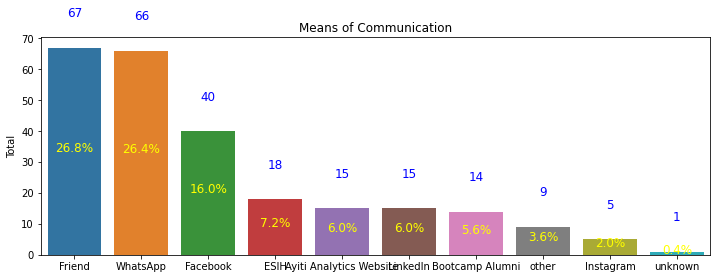

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
Ayiti Analytics Website,15,0.060
LinkedIn,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [ ]:
#pvtable(data=df5, col='Means_of_communication', show_plot= True, figsize= (6,4))
prob_category(data=df5,top_n=10, col='Means_of_communication', show_plot=True, figsize= (12,4), title='Means of Communication')

The percentage of communication channels most likely for a candidate to be selected are Friend, WhatsApp and Facebook

.

##Let's see the average number of university students who should participate in this program.

In [ ]:
education_percent =df5.education_level.value_counts(normalize=True).to_frame()
education_percent
education_total = df5.education_level.value_counts(normalize=False).to_frame()
education_total
education_total.rename(columns={'education_level':'Total'},inplace=True)
education_total.rename(columns={'education_level': 'Total'},inplace=True)
education_percent.rename(columns={'education_level': 'Percent'}, inplace=True)
education_result = pd.concat([education_total,education_percent], axis=1)
education_result

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


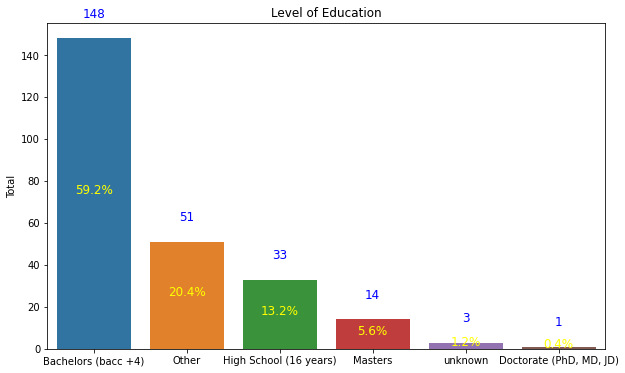

In [ ]:
generate_barchart(data=education_result, title='Level of Education',abs_value='Total', rel_value='Percent')
#prob_category(data=df5, col='education_result', show_plot=True, figsize= (10,4))

In [ ]:
pvtable6= pd.pivot_table(df5, values='quest_id', index='gender', columns='education_level', aggfunc='count')

In [ ]:
#pv_education=pvtable6[('education_level')]
#pv_education.head(1)
#pv_education.sum().to_frame()

##Let's know what will be the average number of applications per week that we could have.

In [ ]:
df5['Inscription_date'] = pd.to_datetime(df5['Inscription_date'])

In [ ]:
df5['male']= df5['gender'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
df5['female'] = df5['gender'].apply(lambda x: 1 if x == 'female' else 0)

In [ ]:
registration_date= df5[['Inscription_date','quest_id','male','female']].groupby(pd.Grouper(key='Inscription_date', freq='7D')).sum()
registration_date.head()

,male,female
Inscription_date,,
2021-02-14,108,28
2021-02-21,41,13
2021-02-28,26,3
2021-03-07,26,3
2021-03-14,2,0


In [ ]:
Prcent_regist= registration_date/df5.shape[0]
Prcent_regist

,male,female
Inscription_date,,
2021-02-14,0.432,0.112
2021-02-21,0.164,0.052
2021-02-28,0.104,0.012
2021-03-07,0.104,0.012
2021-03-14,0.008,0.000


In [ ]:
registration_data =df5[["Inscription_date","quest_id", "female","male"]].groupby(pd.Grouper(key="Inscription_date",freq='7D')).sum()
registration_data
registration_data['sum']=registration_data['male']+registration_data['female']
registration_data.head()
registration_data['frequencies']=registration_data['sum']/df5.shape[0]
registration_data.head()
registration_data_mean=(registration_data['sum'].sum())/registration_data.shape[0]
registration_data_mean

50.0

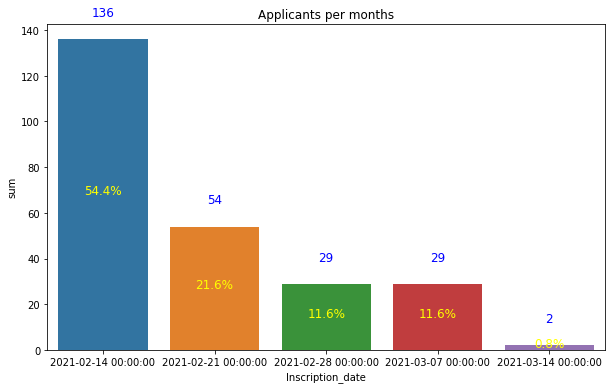

In [ ]:
generate_barchart(data=registration_data,title="Applicants per months",abs_value="sum",rel_value="frequencies")


.

###Let's see if were to do all the bootcamp online, who 
would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time.

In [ ]:
#Find the total and the percent of participants with internet access
int_home=pvtable7["Yes"].to_frame()
int_home_percent= int_home/df5.shape[0]
int_home1=int_home.sort_values(by="Yes", ascending=False)
int_home_percent1=int_home_percent.sort_values(by="Yes",ascending=False)
int_home1.rename(columns={"Yes": "Total Internet"},inplace=True)
int_home_percent1.rename(columns={"Yes": "Total Percent Internet"},inplace=True)
int_df= pd.concat([int_home1,int_home_percent1], axis=1)
int_df.head(3)

,Total Internet,Total Percent Internet
Commune_FR,,
Delmas,61.0,0.244
Port-au-Prince,52.0,0.208
Pétion-Ville,25.0,0.100


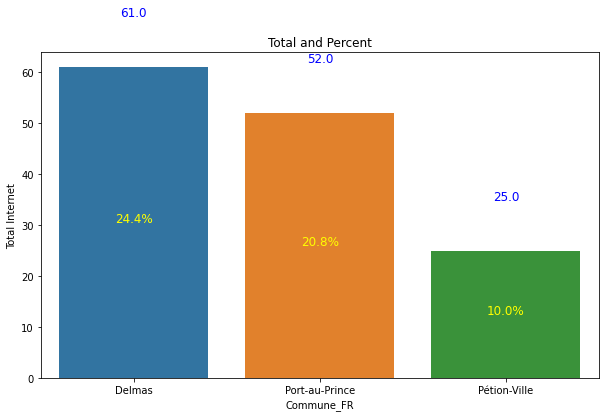

In [ ]:
generate_barchart(data=int_df.iloc[:3,:],title="Total and Percent",abs_value="Total Internet",rel_value="Total Percent Internet")

In [ ]:
comp_home=pvtable8['Yes'].to_frame()
Percent_Computer= comp_home/df5.shape[0]
comp_home1=int_home.sort_values(by="Yes", ascending=False)
Percent_Computer1=Percent_Computer.sort_values(by="Yes",ascending=False)
comp_home1.rename(columns={"Yes":"Total Computer"},inplace= True)
Percent_Computer1.rename(columns={"Yes": "Percent Computer"}, inplace=True)
Tot_comp_df= pd.concat([comp_home1,Percent_Computer1],axis=1)
Tot_comp_df.head(3)



,Total Computer,Percent Computer
Delmas,61.0,0.264
Port-au-Prince,52.0,0.228
Pétion-Ville,25.0,0.100


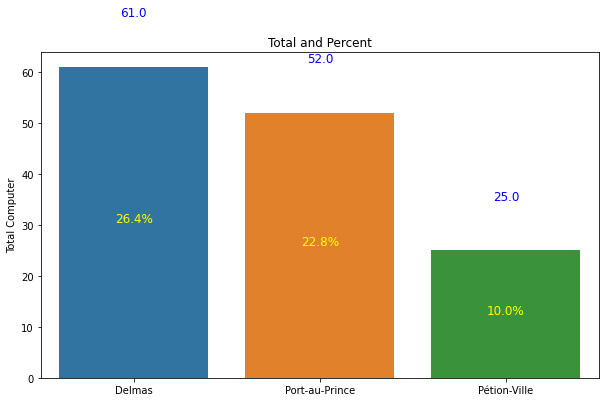

In [ ]:
generate_barchart(data=Tot_comp_df.iloc[:3,:],title="Total and Percent",abs_value="Total Computer",rel_value="Percent Computer")

.

###Let's see the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection


Text(0, 0.5, 'Means_of_communication')

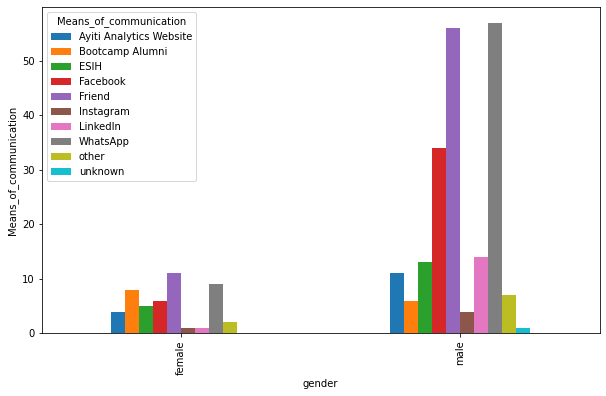

In [ ]:
# Make a matplotlib figure to show the most communication channels to susceptible the women
ax = pvtable5.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 6)
ax.set_xlabel("gender")
ax.set_ylabel("Means_of_communication")

The easiest communication channels to reach a lot more women is through friends and whatsapp.

.

##Let's see which three communes of the country will be the most likely to expand its training centers.


In [ ]:
#How many applicants
total_enscript_by_commune= df5.Commune_FR.value_counts(normalize=False).to_frame()
total_enscript_by_commune.rename(columns={"Commune_FR": "Total"},inplace=True)

#How many applicants by "commune" and "Amount_Payed"
Total_Pay_By_Commune =df5.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()
Total_Pay_By_Commune.rename(columns={"amount_dollars": "Total Pay"},inplace=True)
Total_Pay_By_Commune.sort_values(by=['Total Pay'],  ascending=False, inplace=True)

#Percent pay by commune
Percent_pay_by_Commune = Total_Pay_By_Commune =df5.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()/df5.shape[0]
Percent_pay_by_Commune.rename(columns={"amount_dollars": "Percent_Pay"},inplace=True)
Percent_pay_by_Commune.sort_values(by=['Percent_Pay'],  ascending=False, inplace=True)

Commune= pd.concat([Percent_pay_by_Commune,total_enscript_by_commune],axis=1)
Commune

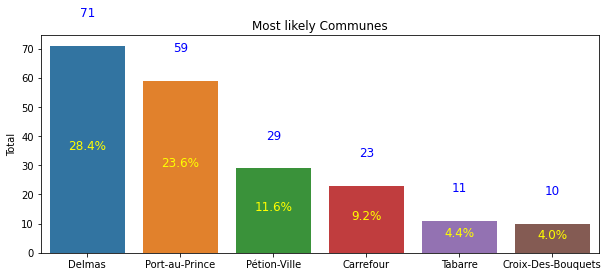

,Total,Percent
Delmas,71,0.284
Port-au-Prince,59,0.236
Pétion-Ville,29,0.116
Carrefour,23,0.092
Tabarre,11,0.044
Croix-Des-Bouquets,10,0.040


In [ ]:
prob_category(data= df5, col='Commune_FR', show_plot=True, figsize=(10,4), title='Most likely Communes')

This presentation suggests the three most likely communes are: Delmas, Port-au-Prince, Petion-Ville